<a href="https://colab.research.google.com/github/nitish102001/git-demo/blob/main/Project_Loan_payback_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_info=pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/DATA/lending_club_info.csv',index_col='LoanStatNew')

In [ ]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [ ]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [ ]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/DATA/lending_club_loan_two.csv')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

<Axes: xlabel='count', ylabel='loan_status'>

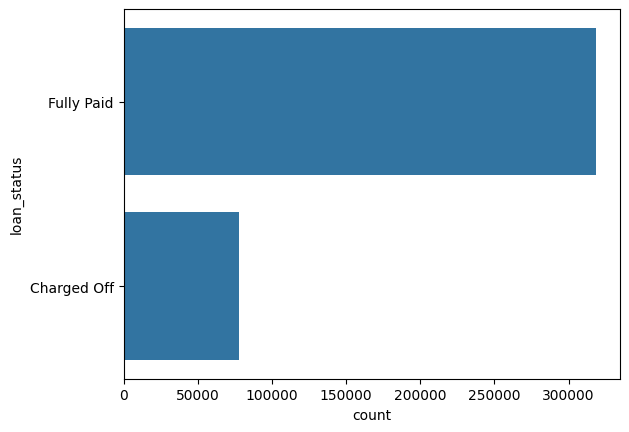

In [ ]:
sns.countplot(df['loan_status'])

<ipython-input-11-3668d996e46e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


<Axes: xlabel='loan_amnt'>

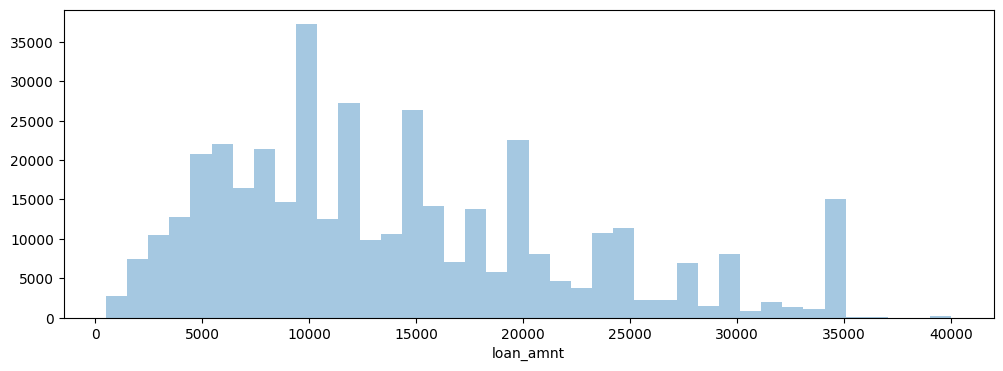

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [ ]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<Axes: xlabel='installment', ylabel='loan_amnt'>

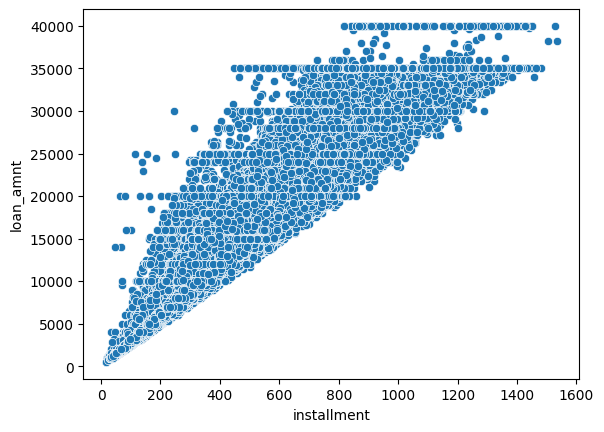

In [ ]:
sns.scatterplot(x = 'installment',y='loan_amnt',data=df)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:

df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
feat_info('grade')

LC assigned loan grade


<Axes: xlabel='grade', ylabel='count'>

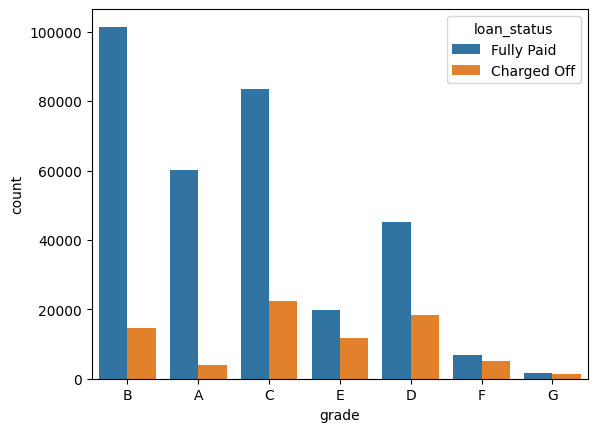

In [ ]:
sns.countplot(x = 'grade',data = df,hue='loan_status')

<ipython-input-20-801b6d1350c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order=subgrade,palette = 'coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

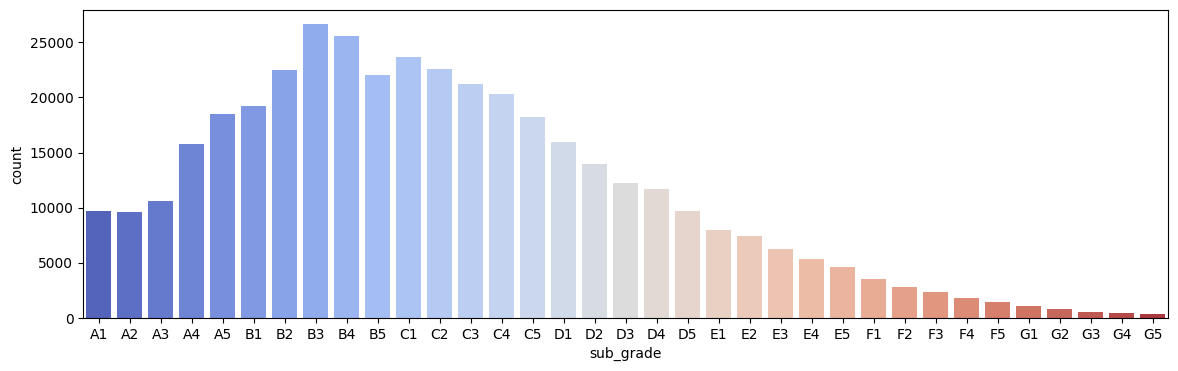

In [ ]:
plt.figure(figsize=(14,4))
subgrade = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade,palette = 'coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

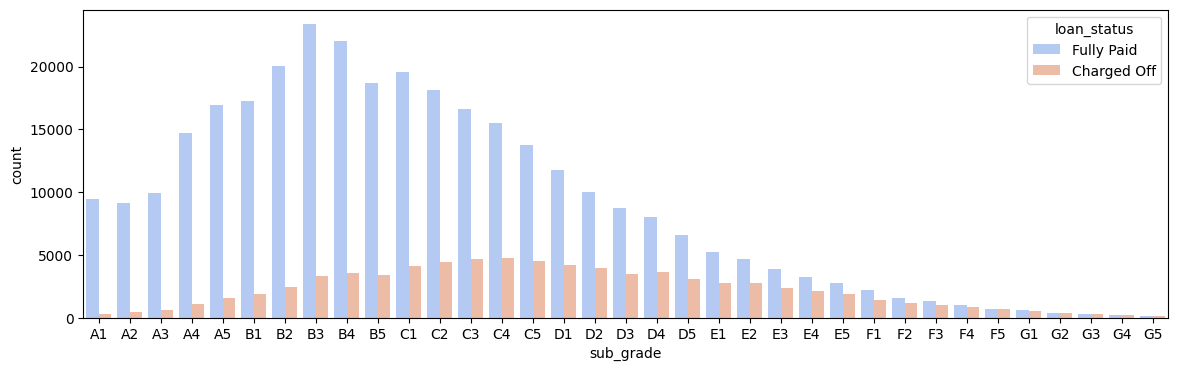

In [ ]:
plt.figure(figsize=(14,4))
subgrade = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade,palette = 'coolwarm',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

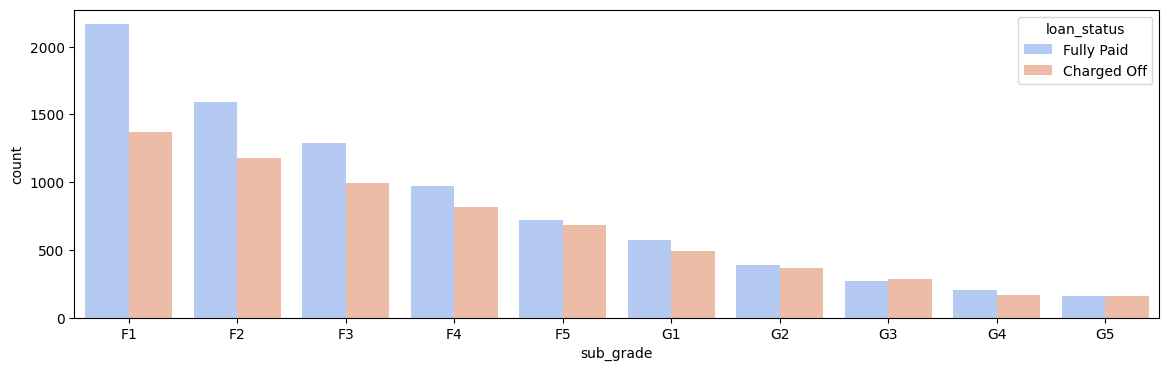

In [ ]:
f_and_g = df[(df['grade'] =='G') | (df['grade']=='F')]

plt.figure(figsize=(14,4))
subgrade = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade,palette = 'coolwarm',hue='loan_status')

In [ ]:
df['loan_status']

,loan_status
0,Fully Paid
1,Fully Paid
2,Fully Paid
3,Fully Paid
4,Charged Off
...,...
396025,Fully Paid
396026,Fully Paid
396027,Fully Paid
396028,Fully Paid


In [ ]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [ ]:
# df.corr()['loan_repaid'].sort_values().plot(kind='bar')

In [ ]:
df.corr()

NameError: name 'df' is not defined

**DATA Preprocessing**

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [ ]:
len(df)

396030

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [ ]:
df.isnull().sum()*100 /len(df)

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


In [ ]:
df['emp_title'].nunique()

173105

In [ ]:
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4389
Manager,4250
Registered Nurse,1856
RN,1846
Supervisor,1830
...,...
Postman,1
"McCarthy & Holthus, LLC",1
jp flooring,1


In [ ]:
df=df.drop('emp_title',axis=1)

In [ ]:
sorted_values = df['emp_length'].sort_values().unique()

In [ ]:
sorted_values = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

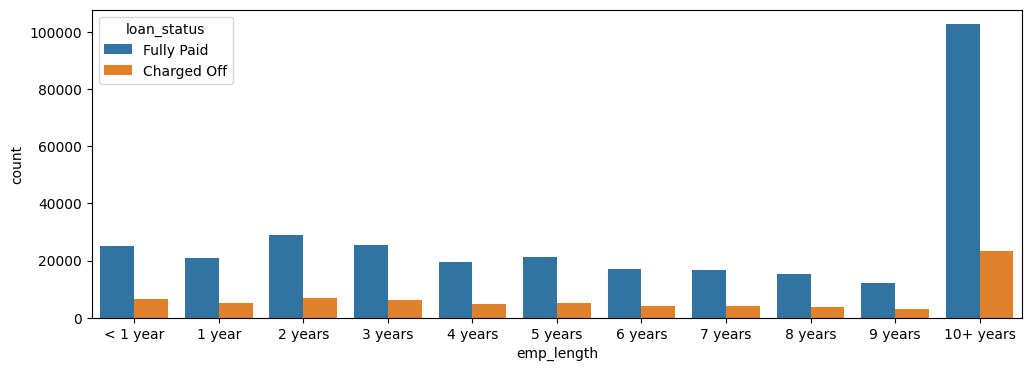

In [ ]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=sorted_values,hue='loan_status')

In [ ]:
emp_FP = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']


In [ ]:
emp_CO = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
ratio = emp_CO/emp_FP

<Axes: xlabel='emp_length'>

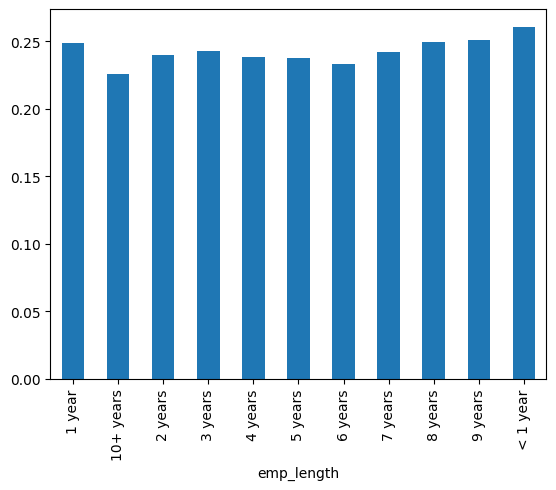

In [ ]:
ratio.plot(kind='bar')

In [ ]:
df=df.drop('emp_length',axis=1)

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
df['purpose'].head(5)

,purpose
0,vacation
1,debt_consolidation
2,credit_card
3,credit_card
4,credit_card


In [ ]:
df = df.drop('title',axis=1)

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,139777
1.0,60416
2.0,49948
3.0,38049
4.0,27887
5.0,18194
6.0,11069
7.0,6052
8.0,3121


In [ ]:
df.corr(numeric_only=True)['mort_acc']

,mort_acc
loan_amnt,0.222315
int_rate,-0.082583
installment,0.193694
annual_inc,0.236320
dti,-0.025439
open_acc,0.109205
pub_rec,0.011552
revol_bal,0.194925
revol_util,0.007514
total_acc,0.381072


In [ ]:
# term['36 months']

In [ ]:
total_acc_avg = df.groupby('total_acc').mean(numeric_only=True)['mort_acc']

In [ ]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [ ]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [ ]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df['term'].value_counts()

,count
term,
36,301247
60,93972


In [ ]:
df=df.drop('grade',axis=1)

In [ ]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [ ]:
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [ ]:

dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,110
NONE,29
ANY,3


In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [ ]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198022
RENT,159395
OWN,37660
OTHER,142


In [ ]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [ ]:
df['zipcode'] = df['address'].apply(lambda add:add[-5:])

In [ ]:
df['zipcode'].value_counts()

,count
zipcode,
70466,56880
22690,56413
30723,56402
48052,55811
00813,45725
29597,45393
05113,45300
11650,11210
93700,11126


In [ ]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)

df = pd.concat([df.drop('zipcode',axis=1),dummies],axis=1)

In [ ]:
df = df.drop('address',axis=1)

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x:int(x[-4:]))

In [ ]:
df['earliest_cr_line']

,earliest_cr_line
0,1990
1,2004
2,2007
3,2006
4,1999
...,...
396025,2004
396026,2006
396027,1997
396028,1990


In [ ]:
df['earliest_cr_line'].value_counts()

,count
earliest_cr_line,
2000,29302
2001,29031
1999,26444
2002,25849
2003,23623
...,...
1951,3
1950,3
1953,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop('loan_status',axis=1)

X and y features and lables assigning

In [ ]:
X= df.drop('loan_repaid',axis=1).values

In [ ]:
y=df['loan_repaid'].values

In [ ]:
print(len(df))

395219


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()

In [ ]:
X_train = scalar.fit_transform(X_train)

In [ ]:
X_test = scalar.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()

model.add(Dense( 78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense( 39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense( 19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:

X_train.shape

(316175, 78)

In [ ]:
model.fit(x=X_train,y=y_train, epochs=25,batch_size=256,validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3503 - val_loss: 0.2639
Epoch 2/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2674 - val_loss: 0.2642
Epoch 3/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2625 - val_loss: 0.2626
Epoch 4/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2618 - val_loss: 0.2627
Epoch 5/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2617 - val_loss: 0.2621
Epoch 6/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2604 - val_loss: 0.2617
Epoch 7/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2612 - val_loss: 0.2622
Epoch 8/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2601 - val_loss: 0.2613
Epoch 9/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2584 - val_loss: 0.2620
Epoch 10/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2571 - val_loss: 0.2613
Epoch 11/25
1236/1236 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2587 - val_loss: 0.2615
Epoch 12/25
1236/1236 ━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('model_loan_payment.h5')

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

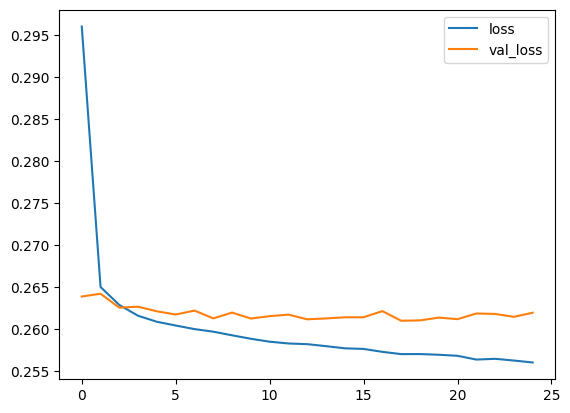

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict(X_test)
# y_pred = model.predict(X_test)
predictions = np.round(predictions).astype(int)
# predict_x=model.predict(X_test)
# classes_x=np.argmax(predict_x,axis=1)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [ ]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
type(y_test[0])

numpy.int64

In [ ]:
# predictions = predictions.astype(np.int64)

In [ ]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 6781,  8877],
       [   57, 63329]])

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
df['loan_repaid']

,loan_repaid
0,1
1,1
2,1
3,1
4,0
...,...
396025,1
396026,1
396027,1
396028,1


In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
# import random
# random.seed(112)
# random_ind = random.randint(0,len(df))
random_ind = 4
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

,4
loan_amnt,24375.0
term,60
int_rate,17.27
installment,609.33
annual_inc,55000.0
...,...
30723,False
48052,False
70466,False
86630,False


In [ ]:
new_customer = scalar.transform(new_customer.values.reshape(1,78))

In [ ]:
new_predict = model.predict(new_customer)
# y_pred = model.predict(X_test)
new_predict = np.round(new_predict).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
new_predict

array([[0]])

In [ ]:
df.iloc[random_ind]['loan_repaid']

0